In [ ]:
import time
import matplotlib.pyplot as plt
from tokenizers import Tokenizer
from tokenizers.models import WordPiece, BPE
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.normalizers import Lowercase, NFKC
from transformers import AutoTokenizer

def compare_tokenizers(text):
    # List of tokenizer models to compare
    models = ["SentencePiece", "WordPiece", "BPE"]

    # Initialize list to store tokenization times
    token_times = []

    # Loop over each tokenizer model
    for model_name in models:
        # Initialize tokenizer
        if model_name == "SentencePiece":
            tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
        elif model_name == "WordPiece":
            tokenizer = Tokenizer(WordPiece(unk_token="[UNK]"))
            tokenizer.pre_tokenizer = Whitespace()
            tokenizer.normalizer = Lowercase()
            tokenizer.normalizer = NFKC()
            tokenizer.train([text])
        elif model_name == "BPE":
            tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
            tokenizer.pre_tokenizer = Whitespace()
            tokenizer.normalizer = Lowercase()
            tokenizer.normalizer = NFKC()
            tokenizer.train([text])

        # Measure tokenization time
        start_time = time.time()
        tokens = tokenizer.encode(text)
        token_time = time.time() - start_time
        token_count = sum(tokens)
        token_times.append(token_time / token_count)

    # Plot bar chart of tokenization times
    plt.figure(figsize=(10, 6))
    plt.bar(models, token_times)
    plt.title("Comparison of Tokenizers")
    plt.xlabel("Tokenizers")
    plt.xticks(rotation=45)
    plt.ylabel("Time per Token (seconds)")
    plt.show()



In [ ]:
text = "This is a sample text for testing tokenization performance."
compare_tokenizers(text)


Exception: ignored

In [ ]:
import time
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

def compare_tokenizers(text, models):
    # Initialize list to store tokenization times
    token_times = []

    # Loop over each tokenizer model
    for model_name in models:
        # Load tokenizer model
        tokenizer = AutoTokenizer.from_pretrained(model_name)

        # Measure tokenization time
        start_time = time.time()
        tokens = tokenizer.encode(text)
        token_time = time.time() - start_time
        token_times.append(token_time)

    # Plot bar chart of tokenization times
    plt.figure(figsize=(10, 5))
    plt.bar(models, token_times)
    plt.title("Comparison of Tokenizers")
    plt.xlabel("Tokenizers")
    plt.ylabel("Time (seconds)")
    plt.show()


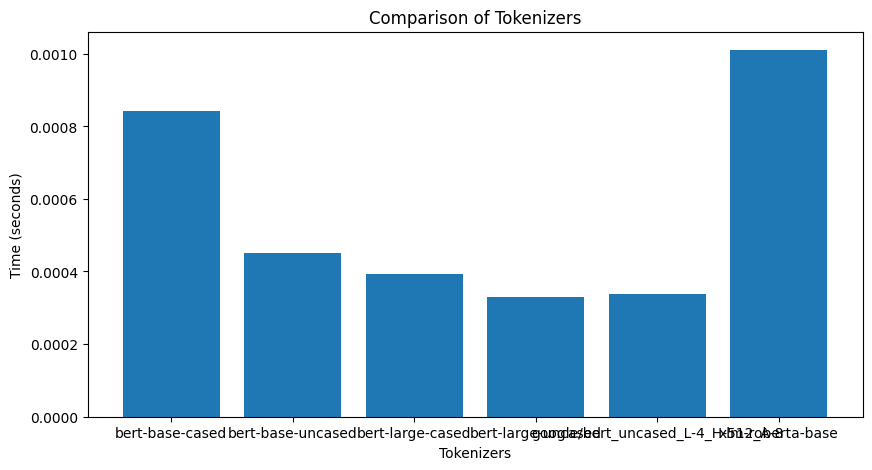

In [ ]:
text = "This is a sample text for testing tokenization performance."
models = ["bert-base-cased", "bert-base-uncased", "bert-large-cased", "bert-large-uncased", "google/bert_uncased_L-4_H-512_A-8", "xlm-roberta-base"]
compare_tokenizers(text, models)


## Question Answer Model

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 20.5 MB/s eta 0:00:00


Epoch 1 loss: 19.245670318603516
Epoch 2 loss: 3.6518588066101074
Epoch 3 loss: 0.45377862453460693
Epoch 4 loss: 0.08180318027734756
Epoch 5 loss: 0.02936168760061264
Epoch 6 loss: 0.014581739902496338
Epoch 7 loss: 0.009882498532533646
Epoch 8 loss: 0.005696492735296488
Epoch 9 loss: 0.0038081652019172907
Epoch 10 loss: 0.0026713991537690163


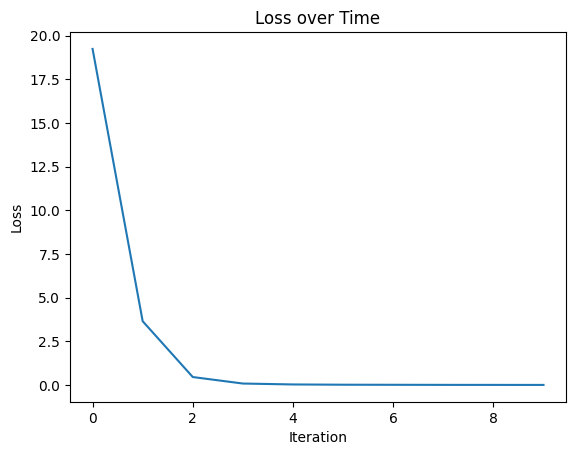

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import matplotlib.pyplot as plt

# Load pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

# Define input question and context
question = "What is the capital of France?"
context = "France is a country in Europe. Its capital is Paris."

# Tokenize input question and context
inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")

# Define training hyperparameters
num_epochs = 10
learning_rate = 0.0001

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train model and store loss values
losses = []
for epoch in range(num_epochs):
    # Forward pass
    start_scores, end_scores = model(**inputs,return_dict=False)
    start_positions = torch.tensor([1])
    end_positions = torch.tensor([1])
    loss = criterion(start_scores, start_positions) + criterion(end_scores, end_positions)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss value
    losses.append(loss.item())

    # Print loss value
    print(f"Epoch {epoch+1} loss: {loss.item()}")

# Plot loss graph
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss over Time")
plt.show()


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

# Load pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

# Define input question and context
question = "What is the capital of France?"
context = "France is a country in Europe. Its capital is Paris."

# Tokenize input question and context
inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")
input_ids = inputs["input_ids"]
attention_mask = inputs["attention_mask"]
token_type_ids = inputs["token_type_ids"]
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Print tokenized inputs
print("Input Question:", question)
print("Input Context:", context)
print("Input IDs:", input_ids)
print("Attention Mask:", attention_mask)
print("Token Type IDs:", token_type_ids)
print("Tokens:", tokens)


Input Question: What is the capital of France?
Input Context: France is a country in Europe. Its capital is Paris.
Input IDs: tensor([[ 101, 2054, 2003, 1996, 3007, 1997, 2605, 1029,  102, 2605, 2003, 1037,
         2406, 1999, 2885, 1012, 2049, 3007, 2003, 3000, 1012,  102]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
Token Type IDs: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
Tokens: ['[CLS]', 'what', 'is', 'the', 'capital', 'of', 'france', '?', '[SEP]', 'france', 'is', 'a', 'country', 'in', 'europe', '.', 'its', 'capital', 'is', 'paris', '.', '[SEP]']


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

In [ ]:
# Define input question and context
question = "what is too expensive?"
context = "The hotels are too expensive to stay but there are more affordable options."

In [ ]:
# Tokenize input question and context
inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")

In [ ]:
# Pass input through BERT model to obtain answer
start_scores, end_scores = model(**inputs,return_dict=False)

In [ ]:

# Find the most likely start and end positions of the answer
start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores) + 1

In [ ]:

# Convert token ids to tokens
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze())

In [ ]:
# Convert answer tokens to string
answer = tokens[start_index:end_index]
answer = tokenizer.convert_tokens_to_string(answer)

In [ ]:
# Print answer
print(answer)

hotels


In [ ]:
# Calculate loss
start_positions = torch.tensor([start_index])
end_positions = torch.tensor([end_index - 1])
loss = model(**inputs, start_positions=start_positions, end_positions=end_positions).loss
print(loss)

tensor(0.0204, grad_fn=<DivBackward0>)
